# **TEMA     : KLASIFIKASI KUALITAS LEMON🍋**
---

### Table of Contents

* [Anggota Kelompok](#chapter1)
* [About Dataset](#chapter2)
* [About Project](#chapter3)
* [Library](#chapter4)
* [Data Collecting](#chapter5)
    * [Load Dataset](#section_5_1)
    * [Jumlah Dataset](#section_5_2)
    * [Ukuran Dataset](#section_5_3)
    * [Lemon Qualitas Buruk](#section_5_4)
    * [Lemon Qualitas Baik](#section_5_5)
* [Data Preprocessing](#chapter6)
    * [Split Folder](#section_6_1)
* [Data Visualisasi & Analysis](#chapter7)
    * [Gambar Augmentasi](#section_7_1)
    * [Grafik Jumlah Dataset](#section_7_2)
    * [Grafik Jumlah Train](#section_7_3)
    * [Grafik Jumlah Test](#section_7_4)
    * [Grafik Jumlah Validation](#section_7_5)
* [Modelling](#chapter8)
    * [Algoritma Model](#section_8_1)
    * [Hasil Model](#section_8_2)
    * [Compile Model](#section_8_3)
    * [Latih Model](#section_8_4)
    * [Save Model](#section_8_5)
* [Evaluate Model](#chapter9)
    * [Grafik Epoch](#section_9_1)
* [Prediksi](#chapter10)
    * [Prediksi Gambar Test Dataset](#section_10_1)
    * [Prediksi Gambar Luar Dataset](#section_10_2)
* [Classification Report](#chapter11)
    * [Confusion Matriks](#section_11_1)
    * [Visualisasi HeatMap](#section_11_2)

### **KELOMPOK : 5 A2** <a class="anchor" id="chapter1"></a>
1.   **2009106026 SULHAIRAH** (Data Modelling)
2.   **2009106028 MITHA AMALIA** (Data Collecting & Preprocessing)
3.   **2009106030 PATRICIA CHANDRA** (Visualisasi & Evaluasi)

### **ABOUT DATASET** <a class="anchor" id="chapter2"></a>
---
Lemon dataset telah disiapkan untuk menyelidiki kemungkinan untuk mengatasi masalah kontrol kualitas buah. Ini berisi 2040 gambar (300 x 300 piksel). Gambar lemon diambil pada permukaan beton.

Dataset berisi gambar lemon berkualitas buruk dan baik di bawah kondisi pencahayaan yang sedikit berbeda (semua di bawah sinar matahari).

### **ABOUT PROJECT** <a class="anchor" id="chapter3"></a>
---
Project ini mendeteksi kualitas lemon dalam kategori baik atau buruknya lemon, berdasarkan dataset dan luar dataset.

### **IMPORT LIBRARY** <a class="anchor" id="chapter4"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix

### **DATA COLLECTING** <a class="anchor" id="chapter5"></a>

#### **LOAD DATASET** <a class="anchor" id="section_5_1">

In [2]:
basePath = r'lemon/'

#### Melihat Jumlah Gambar Pada Dataset <a class="anchor" id="section_5_2">

In [3]:
a = os.listdir(basePath)
class_num = []
for i in a:
  bil = len(os.listdir(basePath+i))
  class_num.append(bil)

print(f"Number of {a[0]} images: {class_num[0]}")
print(f"Number of {a[1]} images: {class_num[1]}")

Number of bad_quality images: 951
Number of good_quality images: 1125


#### Melihat dimensi/ukuran gambar dataset <a class="anchor" id="section_5_3">

In [4]:
bad_img = cv2.imread('lemon/bad_quality/bad_quality_0.jpg')
good_img = cv2.imread('lemon/good_quality/good_quality_0.jpg')
print('Ukuran dari gambar lemon kualitas jelek : ',bad_img.shape)
print('Ukuran dari gambar lemon kualitas bagus : ',good_img.shape)

Ukuran dari gambar lemon kualitas jelek :  (300, 300, 3)
Ukuran dari gambar lemon kualitas bagus :  (300, 300, 3)


#### Menampilkan Gambar Lemon Kualitas Buruk <a class="anchor" id="section_5_4">

In [ ]:
print("Ukuran gambar :",bad_img.shape) 
plt.title("Lemon Kualitas Buruk\n", fontsize=20, fontweight='bold')
plt.imshow(cv2.cvtColor(bad_img,cv2.COLOR_BGR2RGB))
plt.show()

#### Menampilkan Gambar Lemon Kualitas Baik <a class="anchor" id="section_5_5">

Ukuran gambar : (300, 300, 3)


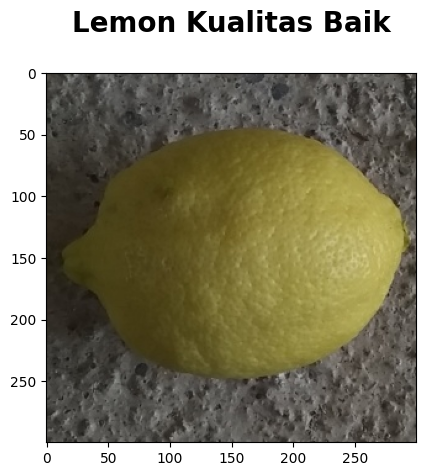

In [6]:
print("Ukuran gambar :",good_img.shape) 
plt.title("Lemon Kualitas Baik\n", fontsize=20, fontweight='bold')
plt.imshow(cv2.cvtColor(good_img,cv2.COLOR_BGR2RGB))
plt.show()

### **DATA PREPROCESSING** <a class="anchor" id="chapter6"></a>

#### **SPLIT FOLDER**  <a class="anchor" id="section_6_1">

In [7]:
# !pip install split-folders

In [8]:
# import splitfolders

In [9]:
# splitfolders.ratio(
#     basePath,
#     output='Data',
#     ratio=(.7,.20,.10) #train 70%, validasi 20%, test 10%
# ) 

In [10]:
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "Data/train" #penyimpanan dataset
TEST_DIR = "Data/test"
VAL_DIR = "Data/val"

training_datagen = ImageDataGenerator(
    rescale = 1./255, #untuk scalling itu mempercepat training
    horizontal_flip = True, #diputar scr horizontal 180 derajat
    rotation_range = 40, #diputar 40 derajat
    brightness_range = (0.5,1.5), #agar bisa prediksi data yg redup atau terang nantinya
    zoom_range = 0.2, #di perbesar 20%
    fill_mode = 'nearest', #mengikuti warna sekitar
)

test = ImageDataGenerator(
    rescale = 1./255)

print('Traning Generator: ', end="")
train_generator = training_datagen.flow_from_directory(
    #merubah ke dimensi 150,150
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')

print('Validation Generator: ', end="")
validation_generator = test.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')


print('Test Generator: ', end="")
test_generator = test.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')

Traning Generator: Found 1452 images belonging to 2 classes.
Validation Generator: Found 415 images belonging to 2 classes.
Test Generator: Found 314 images belonging to 2 classes.


### **DATA VISUALISASI** <a class="anchor" id="chapter7"></a>

#### **Menampilkan Gambar Hasil Augmentasi**  <a class="anchor" id="section_7_1">

In [11]:
class_names = ['bad','good'] #nama kelas

Ukuran gambar : (64, 150, 150, 3)
Ukuran gambar : (64, 150, 150, 3)
Ukuran gambar : (64, 150, 150, 3)
Ukuran gambar : (64, 150, 150, 3)
Ukuran gambar : (64, 150, 150, 3)
Ukuran gambar : (64, 150, 150, 3)


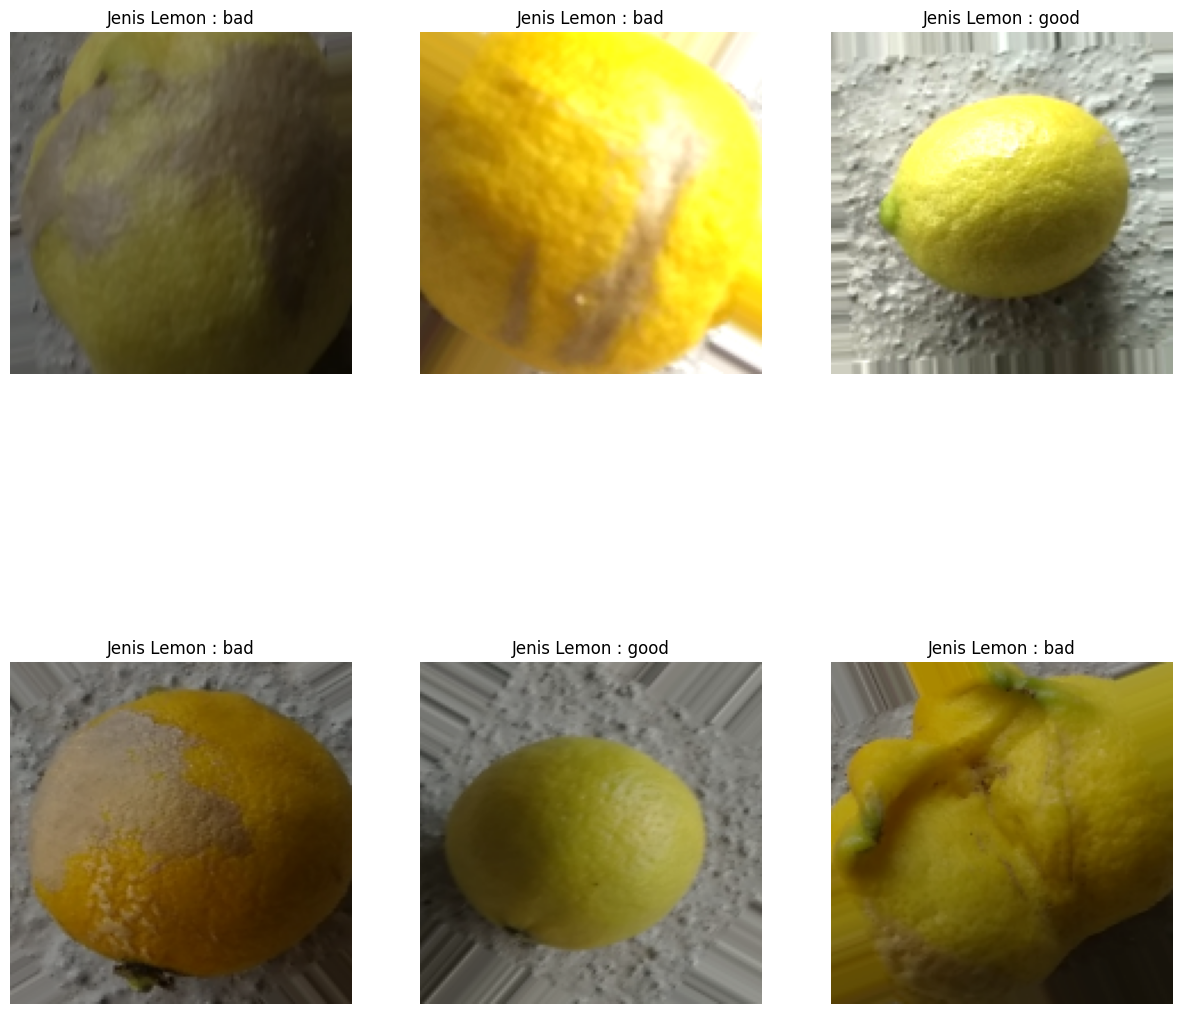

In [12]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    img, labels = train_generator.next() #data dari dataset train
    print("Ukuran gambar :",img.shape) 
    temp = tf.cast(labels[i], dtype=tf.int32) #mengubah float jadi int. indeks tdk bisa float
    plt.title(f'Jenis Lemon : {class_names[temp]}')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img[i])

#### **Jumlah Dataset Train, Test, Val**  <a class="anchor" id="section_7_2">

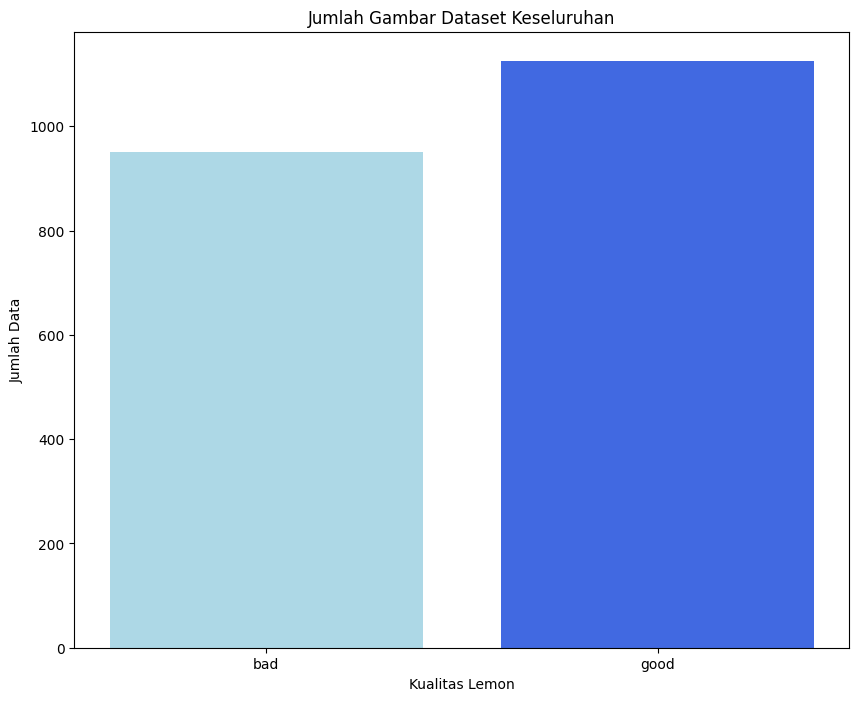

In [13]:
list_semua = [] #untuk menyimpan file

# perulangan untuk menyimpan file tiap kelas kedalam list
for kelas in os.listdir(basePath):
    list_file_kelas = os.listdir(os.path.join(basePath, kelas))
    banyaknya_file = len(list_file_kelas)
    list_semua.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classname
y = list_semua # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
plt.figure(figsize=(10, 8))
plt.bar(x, y, color=['lightblue','royalblue'])
plt.title('Jumlah Gambar Dataset Keseluruhan')
plt.xlabel('Kualitas Lemon')
plt.ylabel('Jumlah Data')
plt.show()


#### **Jumlah Data Train**  <a class="anchor" id="section_7_3">

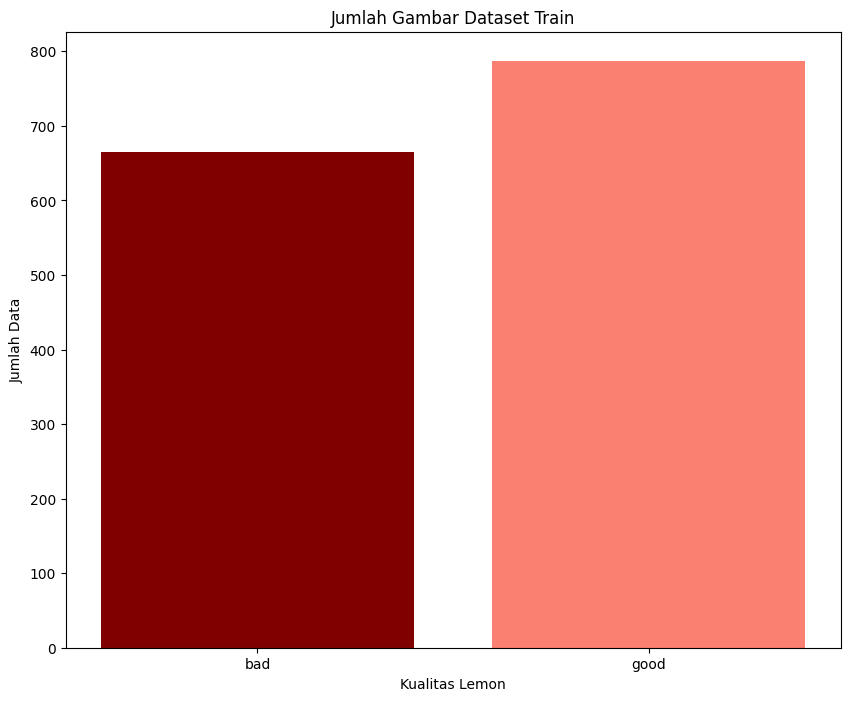

In [14]:
list_semua_train = []

# perulangan untuk menyimpan file tiap kelas kedalam list
for kelas in os.listdir(TRAINING_DIR):
    list_file_kelasTr = os.listdir(os.path.join(TRAINING_DIR, kelas))
    banyaknya_fileTr = len(list_file_kelasTr)
    list_semua_train.append(banyaknya_fileTr) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classname
y = list_semua_train # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
plt.figure(figsize=(10, 8))
plt.bar(x, y, color=['maroon','salmon'])
plt.title('Jumlah Gambar Dataset Train')
plt.xlabel('Kualitas Lemon')
plt.ylabel('Jumlah Data')
plt.show()

#### **Jumlah Data Test**  <a class="anchor" id="section_7_4">

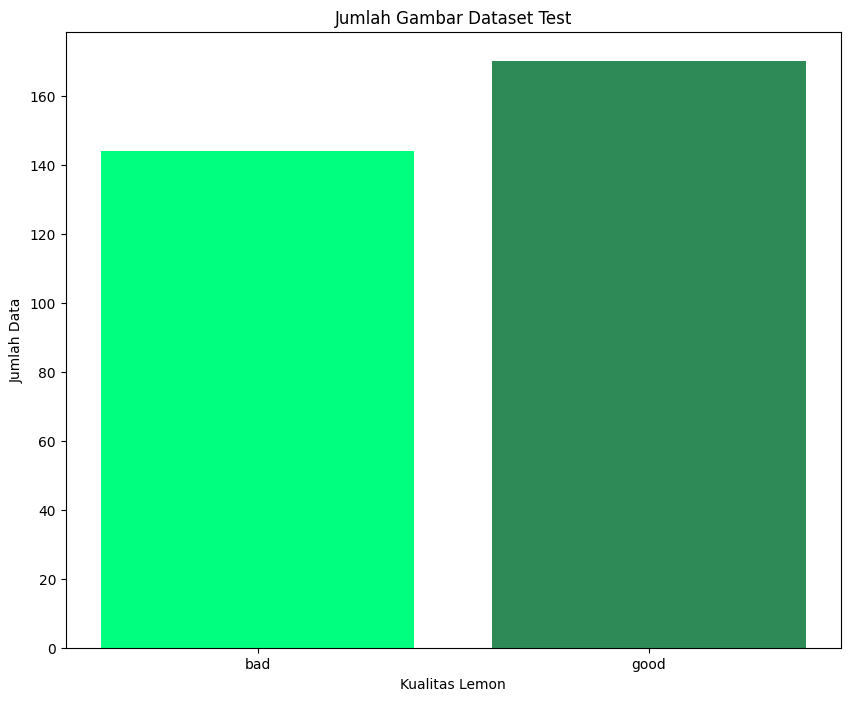

In [15]:
list_semua_test = []

# perulangan untuk menyimpan file tiap kelas kedalam list
for kelas in os.listdir(TEST_DIR):
    list_file_kelasT = os.listdir(os.path.join(TEST_DIR, kelas))
    banyaknya_fileT = len(list_file_kelasT)
    list_semua_test.append(banyaknya_fileT) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classname
y = list_semua_test # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
plt.figure(figsize=(10, 8))
plt.bar(x, y, color=['springgreen','seagreen'])
plt.title('Jumlah Gambar Dataset Test')
plt.xlabel('Kualitas Lemon')
plt.ylabel('Jumlah Data')
plt.show()

#### **Jumlah Data Validation**  <a class="anchor" id="section_7_5">

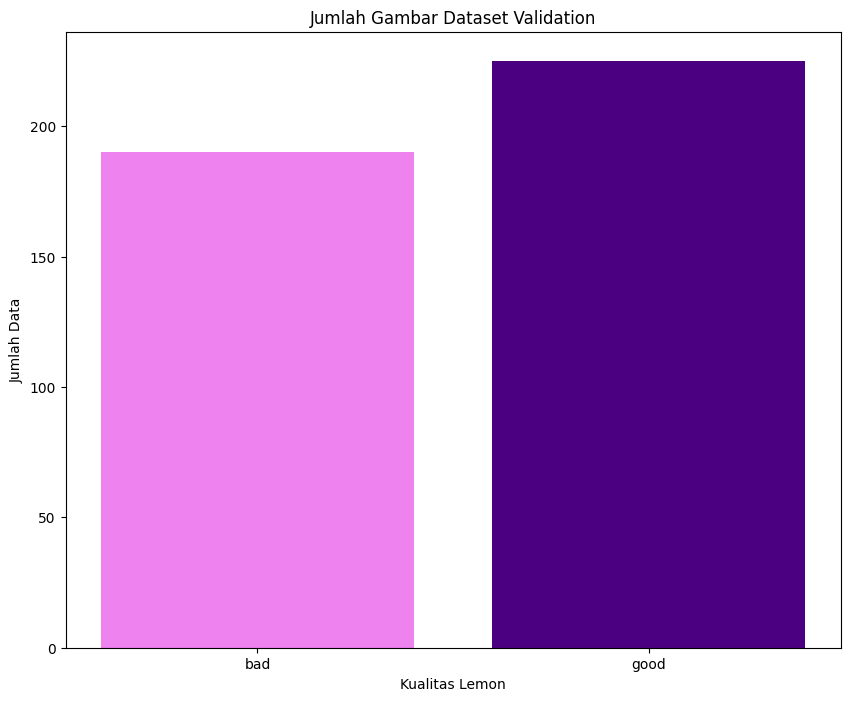

In [16]:
list_semua_val = []

# perulangan untuk menyimpan file tiap kelas kedalam list
for kelas in os.listdir(VAL_DIR):
    list_file_kelasV = os.listdir(os.path.join(VAL_DIR, kelas))
    banyaknya_fileV = len(list_file_kelasV)
    list_semua_val.append(banyaknya_fileV) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classname
y = list_semua_val # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
plt.figure(figsize=(10, 8))
plt.bar(x, y, color=['violet','indigo'])
plt.title('Jumlah Gambar Dataset Validation')
plt.xlabel('Kualitas Lemon')
plt.ylabel('Jumlah Data')
plt.show()

### **MODELLING** <a class="anchor" id="chapter8"></a>

#### Menggunakan CNN  <a class="anchor" id="section_8_1">

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Melihat Hasil Modelling  <a class="anchor" id="section_8_2">

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 150, 150, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 35, 35, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

#### Compile Model  <a class="anchor" id="section_8_3">

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#### Melatih Model  <a class="anchor" id="section_8_4">

In [20]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = validation_generator,
    verbose = 1, #untuk melihat progres bentuknya yang ===
)

Epoch 1/50
23/23 [==============================] - 88s 4s/step - loss: 2.4196 - accuracy: 0.5158 - val_loss: 0.6899 - val_accuracy: 0.5422
Epoch 2/50
23/23 [==============================] - 82s 4s/step - loss: 0.6898 - accuracy: 0.5351 - val_loss: 0.7103 - val_accuracy: 0.4578
Epoch 3/50
23/23 [==============================] - 81s 4s/step - loss: 0.6940 - accuracy: 0.5434 - val_loss: 0.6868 - val_accuracy: 0.5422
Epoch 4/50
23/23 [==============================] - 80s 3s/step - loss: 0.7028 - accuracy: 0.5475 - val_loss: 0.6774 - val_accuracy: 0.7446
Epoch 5/50
23/23 [==============================] - 83s 4s/step - loss: 0.7234 - accuracy: 0.5296 - val_loss: 0.6798 - val_accuracy: 0.5422
Epoch 6/50
23/23 [==============================] - 83s 4s/step - loss: 0.6807 - accuracy: 0.5696 - val_loss: 0.6665 - val_accuracy: 0.5422
Epoch 7/50
23/23 [==============================] - 82s 4s/step - loss: 0.7269 - accuracy: 0.5358 - val_loss: 0.6768 - val_accuracy: 0.5422
Epoch 8/50
23/23 [==

#### Save Model  <a class="anchor" id="section_8_5">

In [21]:
model.save('ModelBaru.h5')

### **EVALUATE MODEL** <a class="anchor" id="chapter9"></a>

In [22]:
eval = model.evaluate(test_generator)
print(f'Test loss\t\t: {eval[0]}')
print(f'Test accuracy\t\t: {eval[1]}')

5/5 [==============================] - 7s 2s/step - loss: 0.0390 - accuracy: 0.9809
Test loss		: 0.03903007507324219
Test accuracy		: 0.9808917045593262


#### Menampilkan Hasil Epoch Untuk Melihat Terjadinya Overfitting  <a class="anchor" id="section_9_1">

In [23]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

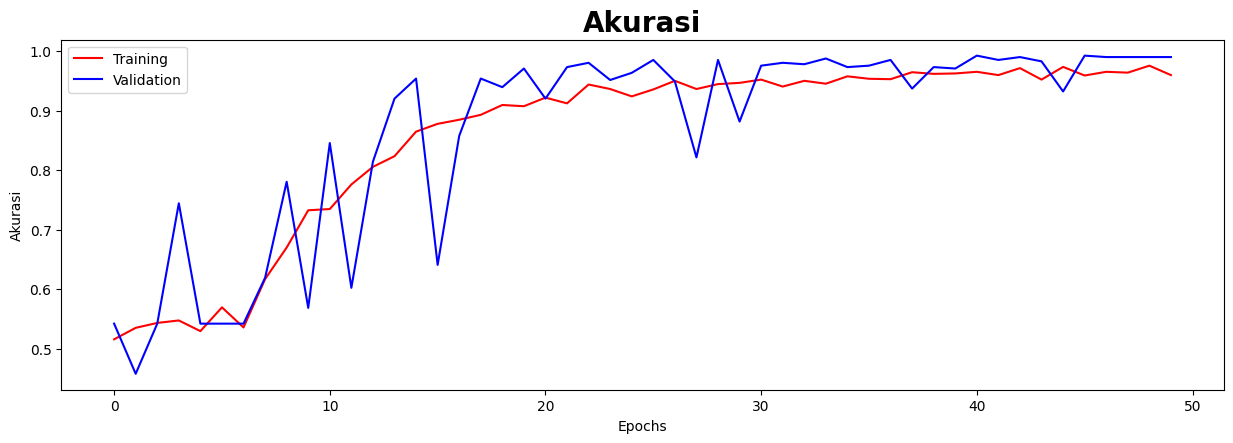

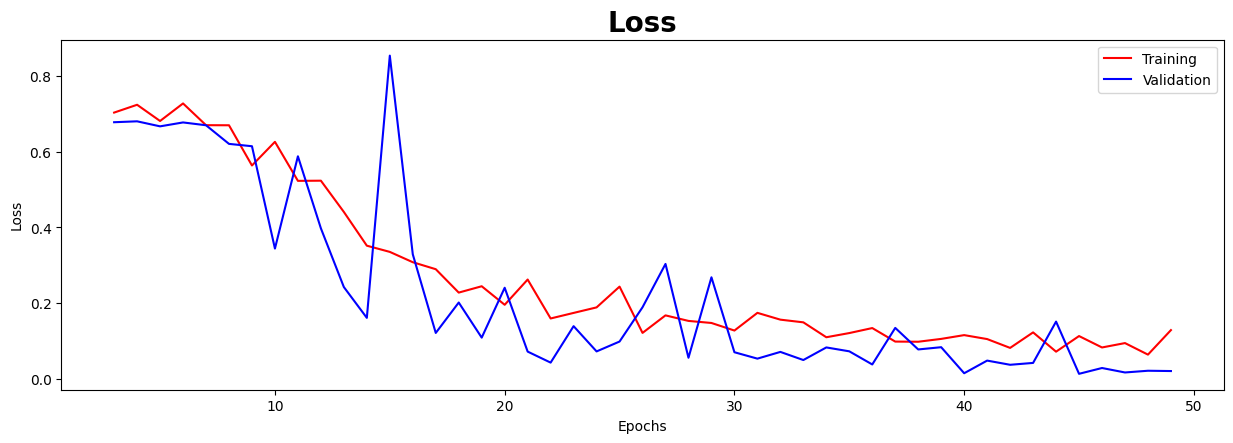

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#untk melihat apakah terjadi overfitting

In [25]:
result = model.predict(test_generator)
print(result) #probabilitas

5/5 [==============================] - 4s 657ms/step
[[1.00000000e+00]
 [9.99977589e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99993682e-01]
 [1.00000000e+00]
 [1.93986405e-09]
 [5.54098688e-06]
 [9.90293443e-01]
 [1.75096029e-05]
 [1.00000000e+00]
 [1.48256386e-05]
 [9.99998033e-01]
 [9.99927759e-01]
 [9.99987662e-01]
 [1.20349832e-01]
 [2.83821230e-12]
 [7.75245468e-08]
 [1.00000000e+00]
 [3.30952488e-10]
 [1.25481019e-04]
 [2.91038858e-04]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.19203553e-01]
 [1.24593296e-08]
 [1.09273624e-05]
 [8.27368012e-07]
 [3.65800474e-07]
 [9.99986947e-01]
 [3.73246295e-11]
 [9.99881804e-01]
 [1.22289384e-05]
 [1.00000000e+00]
 [2.48744439e-13]
 [1.00000000e+00]
 [9.99824703e-01]
 [1.00000000e+00]
 [9.73251080e-09]
 [9.99998987e-01]
 [9.96863186e-01]
 [1.69299201e-05]
 [9.99697328e-01]
 [1.00000000e+00]
 [4.61269607e-04]
 [1.17801048e-01]
 [1.00000000e+00]
 [1.02340172e-08]
 [9.22259748e-01]
 [9.99999940e-01]
 [6.46465867e-11]
 [4.0000747

### **PREDIKSI** <a class="anchor" id="chapter10"></a>

#### Prediksi dari dataset Test  <a class="anchor" id="section_10_1">

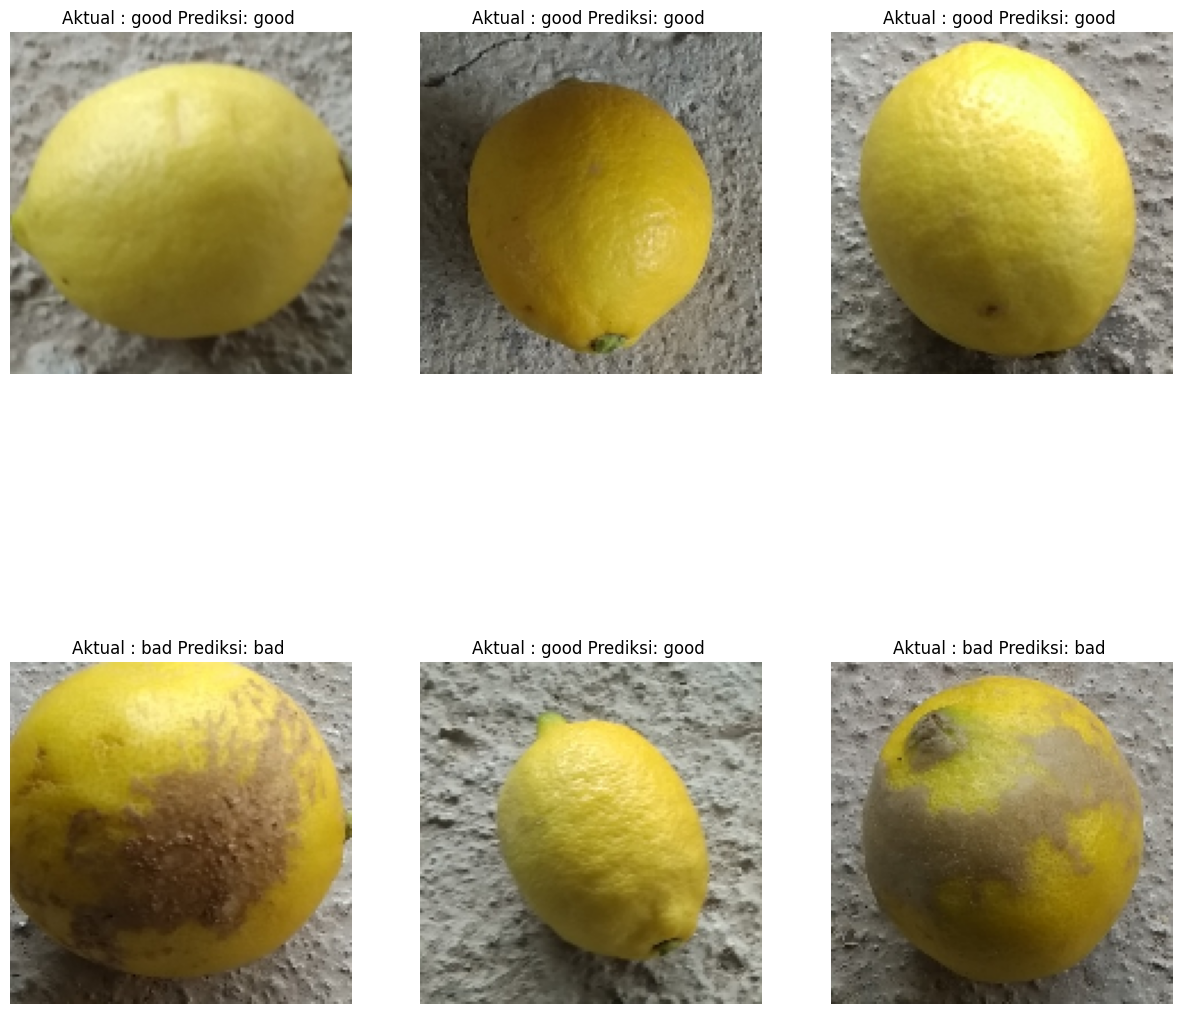

In [26]:
img, labels = test_generator.next()
plt.figure(figsize=(15,15))
for i in range(6):
    predictions = model.predict(tf.expand_dims(img[i], 0),verbose=0)

    plt.subplot(2,3,i+1)

    hasil = 0
    if (predictions > 0.5):
      hasil = 1

    temp = tf.cast(labels[i], dtype=tf.int32) #mengubah float jadi int. indeks tdk bisa float

    plt.title(f'Aktual : {class_names[temp]} Prediksi: {class_names[hasil]} ')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img[i])

#### Prediksi dari luar dataset  <a class="anchor" id="section_10_2">

In [27]:
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=[150,150])
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.cast(img_array, dtype=tf.float32) / tf.constant(256, dtype=tf.float32)
    img_array = tf.expand_dims(img_array, 0)


    hasil = 0
    predictions = model.predict(img_array)
    if (predictions > 0.5):
      hasil = 1
    print(f'label : {class_names[hasil]}')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img)

1/1 [==============================] - 0s 65ms/step
label : good


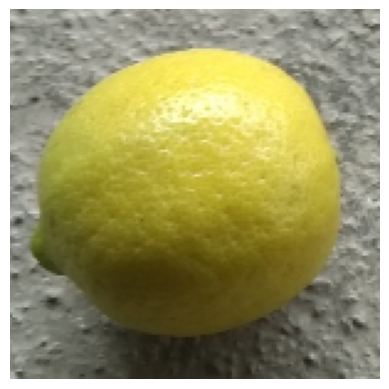

In [28]:
predict_image("cobagood.jpg")

1/1 [==============================] - 0s 54ms/step
label : bad


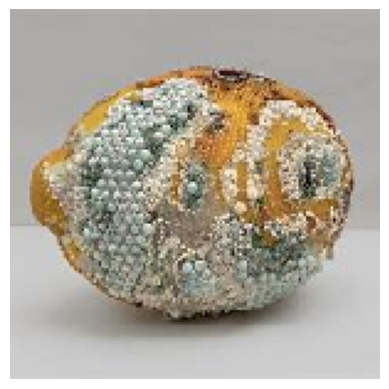

In [29]:
predict_image("bad1.jpeg") #gambar dari google

1/1 [==============================] - 0s 54ms/step
label : good


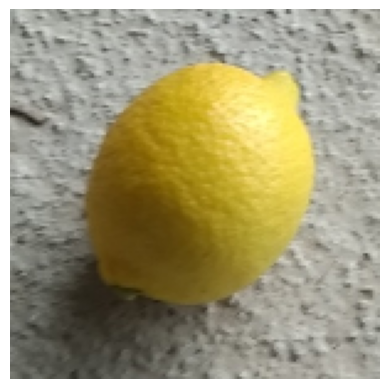

In [30]:
predict_image("Data/test/good_quality/good_quality_262.jpg") #gambar dari test

### **Classification report dan Confusion Matrix** <a class="anchor" id="chapter11"></a>

In [31]:
y_pred = model.predict(test_generator)

5/5 [==============================] - 4s 678ms/step


In [32]:
y_predict = np.argmax(y_pred, axis=1)

#### **Confusion Matriks**  <a class="anchor" id="section_11_1">

In [33]:
print("Confusion Matrix")
print(confusion_matrix(test_generator.labels, y_predict))
print("\nClassification Report")
print(classification_report(test_generator.labels, y_predict, target_names = class_names))

Confusion Matrix
[[144   0]
 [170   0]]

Classification Report
              precision    recall  f1-score   support

         bad       0.46      1.00      0.63       144
        good       0.00      0.00      0.00       170

    accuracy                           0.46       314
   macro avg       0.23      0.50      0.31       314
weighted avg       0.21      0.46      0.29       314



D:\coba\venv_PA\PA_KB\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\coba\venv_PA\PA_KB\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\coba\venv_PA\PA_KB\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **VISUALISASI MENGGUNAKAN HEATMAP**  <a class="anchor" id="section_11_2">

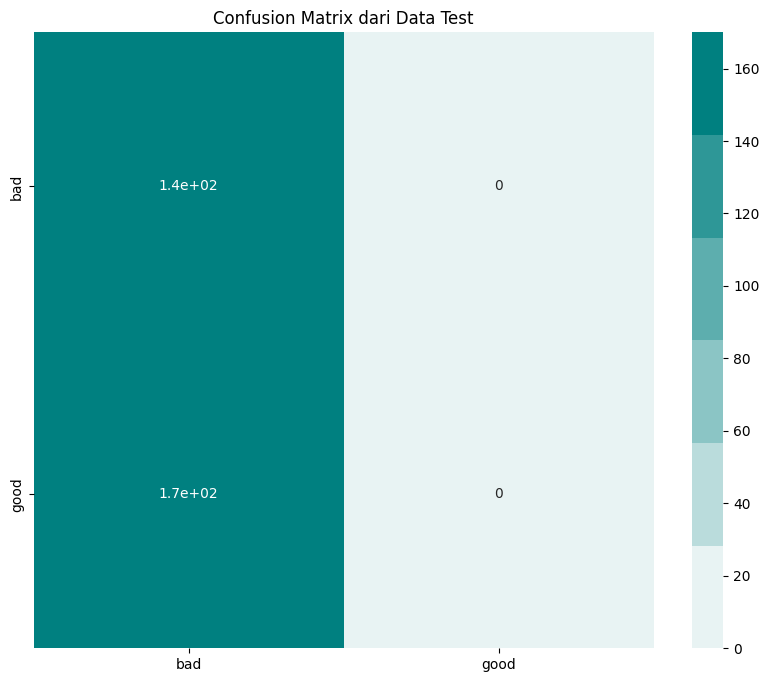

In [40]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_generator.labels, y_predict)

warna = sns.light_palette("#008080") #untuk warna heatmap
sns.heatmap(cm,annot=True,cmap=color,xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix dari Data Test")
plt.show()